## Import the Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from src.Client import Client
from src.Server import Server

## Data Preprocessing

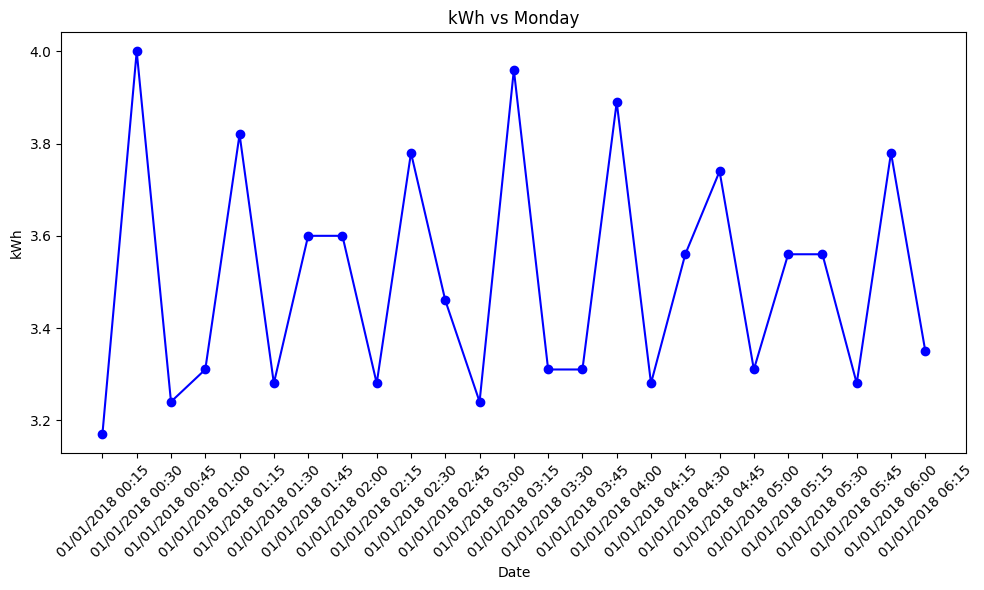

In [5]:
df=data = pd.read_csv("Steel_industry_data.csv")
# df = pd.DataFrame(data)

# Plot kWh vs Day_of_week
df=df[df['Day_of_week'] == 'Monday']
df=df.head(25)
plt.figure(figsize=(10, 6))
# plt.plot(df['Day_of_week'], df['Usage_kWh'], marker='o', linestyle='-', color='b')
plt.plot(df['date'], df['Usage_kWh'], marker='o', linestyle='-', color='b')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('kWh')
plt.title('kWh vs Monday')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

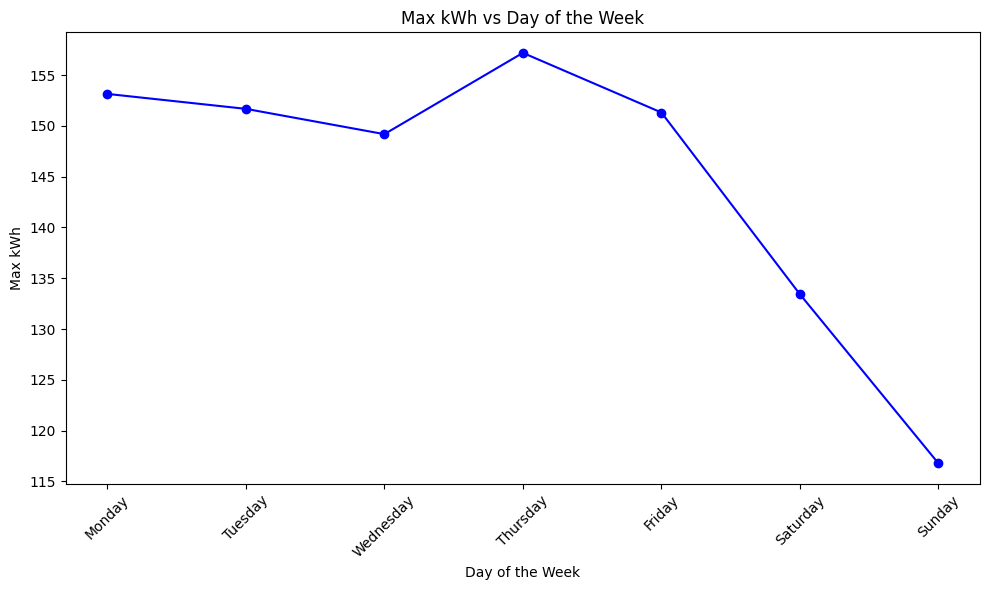

In [6]:
df=data = pd.read_csv("Steel_industry_data.csv")
df_max_kwh = df.groupby('Day_of_week')['Usage_kWh'].max().reset_index()

# Sort by Day_of_week to ensure the days are in the correct order (if needed)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_max_kwh['Day_of_week'] = pd.Categorical(df_max_kwh['Day_of_week'], categories=days_order, ordered=True)
df_max_kwh = df_max_kwh.sort_values('Day_of_week')

# Plot max kWh vs Day_of_week
plt.figure(figsize=(10, 6))
plt.plot(df_max_kwh['Day_of_week'], df_max_kwh['Usage_kWh'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Max kWh')
plt.title('Max kWh vs Day of the Week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
data = pd.read_csv("Steel_industry_data.csv")
print(data.isnull().sum())  # Count of missing values in each column
datecol=data.iloc[:,0]
print(datecol)

data = data.drop(columns=['date'])
X_train=data.values
feature_names = data.columns.tolist()

data.head()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
0        01/01/2018 00:15
1        01/01/2018 00:30
2        01/01/2018 00:45
3        01/01/2018 01:00
4        01/01/2018 01:15
               ...       
35035    31/12/2018 23:00
35036    31/12/2018 23:15
35037    31/12/2018 23:30
35038    31/12/2018 23:45
35039    31/12/2018 00:00
Name: date, Length: 35040, dtype: object


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [8]:
print(feature_names)

['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [9]:
kwh=data.iloc[:,1]


Feature Scaling

In [10]:
#Feature Scaling
scaler = StandardScaler()


X_train[:, :7] = scaler.fit_transform(X_train[:, :7]).astype('float64')





Column tranforming and label encoding

In [11]:
# Transforming Categorical data into number matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7,8])],remainder='passthrough')
X_train=ct.fit_transform(X_train)
print(X_train)
print(X_train.shape)



[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 'Light_Load']
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 'Light_Load']
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 'Light_Load']
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 'Light_Load']
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 'Light_Load']]
(35040, 17)


In [12]:
#label encoding on the suitable column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_train[:,-1]=le.fit_transform(X_train[:,-1])
print(X_train)
type(X_train)
df=pd.DataFrame(X_train)
df.to_csv('scaled_Steel_industry_data.csv', index=False, header=True)

[[1.0 0.0 0.0 ... 0.5132676163619359 -1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6419289107691397 0]
 [1.0 0.0 0.0 ... 0.5132676163619359 -1.6058425610819058 0]
 ...
 [1.0 0.0 0.0 ... 0.5126109334762843 1.6780152604563736 0]
 [1.0 0.0 0.0 ... 0.5119542505906323 1.7141016101436073 0]
 [1.0 0.0 0.0 ... 0.5126109334762843 -1.7141016101436073 0]]


## Federated Learning

In [13]:
#splitting the entire data into 8 nodes to perform FL
node_data = np.array_split(X_train, 8)


In [14]:
train_data = np.concatenate(node_data[:7], axis=0)

# Use the last chunk for testing
test_data = node_data[7]

# Verify the splits
print(f"Training Data Shape: {train_data.shape}")
print(f"Testing Data Shape: {test_data.shape}")

Training Data Shape: (30660, 17)
Testing Data Shape: (4380, 17)


In [15]:
server_node = Server()
server_node.print_dag()

Adjacency Matrix:
[0]

Nodes:
Node 0: {'model': {'coef_': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'intercept_': 0.0}, 'metadata': {'is_global': True}, 'client_id': None}


### Federated Learning Process

#### With OOPS approach

In [16]:
clients = [
    Client(
        client_id=f"Client {i + 1}", 
        local_data=np.concatenate((node[:, :9], node[:, 10:]), axis=1),  # Features (remove 12th column)
        local_labels=node[:, 9], # Labels (Usage_kWh),
        address="New York, USA" if i % 2 == 0 else "Nagpur, India"
    )  
    for i, node in enumerate(node_data)  # Only using the first 7 chunks for clients
]

In [17]:
for client in clients:
    print(f"Client ID: {client.client_id}")
    print("lat and long:")
    print(client.latitude , client.longitude)
    print("-" * 50)


Client ID: Client 1
lat and long:
40.7127281 -74.0060152
--------------------------------------------------
Client ID: Client 2
lat and long:
21.1498134 79.0820556
--------------------------------------------------
Client ID: Client 3
lat and long:
40.7127281 -74.0060152
--------------------------------------------------
Client ID: Client 4
lat and long:
21.1498134 79.0820556
--------------------------------------------------
Client ID: Client 5
lat and long:
40.7127281 -74.0060152
--------------------------------------------------
Client ID: Client 6
lat and long:
21.1498134 79.0820556
--------------------------------------------------
Client ID: Client 7
lat and long:
40.7127281 -74.0060152
--------------------------------------------------
Client ID: Client 8
lat and long:
21.1498134 79.0820556
--------------------------------------------------


In [18]:

# Train local models for each client
for client in clients:
    # Each client fetches the global model
    global_model = client.get_global_model(server_node)

    # Client trains its local model
    local_update = client.train_local_model(global_model)

    # Client sends its update to the server
    metadata = {"weight": 1, "timestamp":1}  # Add any relevant metadata
    client.send_update_to_server(server_node, metadata)

    # Evaluate the client's local model
    y_pred = client.local_model.predict(client.local_data)
    mse = mean_squared_error(client.local_labels, y_pred)
    print(f"  {client.client_id} - MSE: {mse:.4f}")

    # Server aggregates the updates
    aggregated_model = server_node.aggregate()

    # Update global model after aggregation
    server_node.global_model.coef_ = aggregated_model["coef_"]
    server_node.global_model.intercept_ = aggregated_model["intercept_"]



# Print the final DAG
print("Final DAG after training:")
server_node.print_dag()


Client 1 Client 1
  Client 1 - MSE: 0.0491
Client 2 Client 1
Client 2 Client 2
  Client 2 - MSE: 0.0139
Client 3 Client 1
Client 3 Client 2
Client 3 Client 3
  Client 3 - MSE: 0.0131
Client 4 Client 1
Client 4 Client 2
Client 4 Client 3
Client 4 Client 4
  Client 4 - MSE: 0.0113
Client 5 Client 1
Client 5 Client 2
Client 5 Client 3
Client 5 Client 4
Client 5 Client 5
  Client 5 - MSE: 0.0124
Client 6 Client 1
Client 6 Client 2
Client 6 Client 3
Client 6 Client 4
Client 6 Client 5
Client 6 Client 6
  Client 6 - MSE: 0.0097
Client 7 Client 1
Client 7 Client 2
Client 7 Client 3
Client 7 Client 4
Client 7 Client 5
Client 7 Client 6
Client 7 Client 7
  Client 7 - MSE: 0.0123
Client 8 Client 1
Client 8 Client 2
Client 8 Client 3
Client 8 Client 4
Client 8 Client 5
Client 8 Client 6
Client 8 Client 7
Client 8 Client 8
  Client 8 - MSE: 0.0091
Final DAG after training:
Adjacency Matrix:
[0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 1, 0, 1,

## Final Evaluation of our Global model

In [19]:

# test_data = node_data[0][:4380]  # comment this line for 98% accuracy
y_test = test_data[:, 9]   # Target (Usage_kWh)
    # Select all columns except the 12th column using slicing
X_test= np.concatenate((test_data[:, :9], test_data[:, 10:]), axis=1)

df=pd.DataFrame(y_test)
df.to_csv('test_data.csv', index=False, header=True)
y_pred= server_node.global_model.predict(X_test)
# y_pred = global_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final Global Model MSE on Test Data: {final_mse:.4f}")

Final Global Model MSE on Test Data: 0.0097


comparing the predicted results vs the actual results

In [20]:
output=np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

df=pd.DataFrame(output)
df.to_csv("output.csv", index=False, header=True)

## R2 Score with FL

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.9881780105005141


## Visualizing the Results (FL)

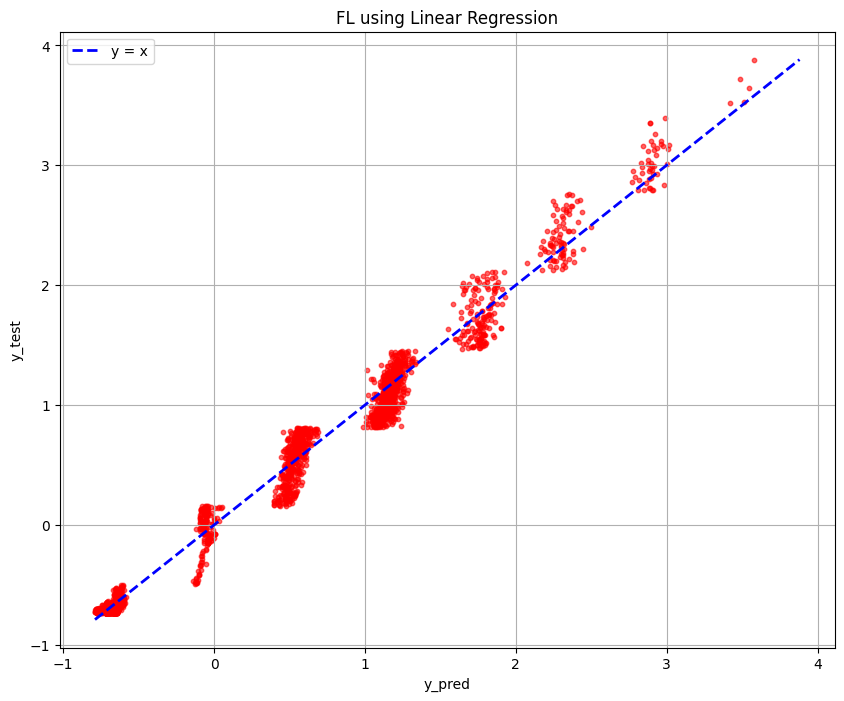

In [22]:


# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


## Comparision of Global model if done Without FL

In [23]:
regressor=LinearRegression()
without_FL=X_train

X_withoutFL= np.concatenate((without_FL[:, :9], without_FL[:, 10:]), axis=1)
y_withoutFL = without_FL[:, 9]   # Target (Usage_kWh)


In [24]:
from sklearn.model_selection import train_test_split

X_withoutFL_train, X_withoutFL_test,y_withoutFL_train,y_withoutFL_test = train_test_split(X_withoutFL,y_withoutFL,test_size=0.25,random_state=0)

In [25]:
X_withoutFL_test.shape

(8760, 16)

In [26]:
X_withoutFL_train.shape

(26280, 16)

In [27]:
y_withoutFL_test.shape

(8760,)

In [28]:
y_withoutFL_train.shape

(26280,)

In [29]:
regressor.fit(X_withoutFL_train,y_withoutFL_train)

LinearRegression()

In [30]:
pred=regressor.predict(X_test)

print(pred)

[ 1.19938469  1.2490406   1.27412224 ... -0.68420792 -0.68141747
 -0.6799469 ]


In [31]:
y_test

array([1.1336328833558145, 1.2511430932708638, 1.3136358003249227, ...,
       -0.705865364474675, -0.705865364474675, -0.7091544543196255],
      shape=(4380,), dtype=object)

## Visualising the results (Without FL)

In [32]:
# plt.scatter(pred,y_test,color='red')

# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.show()

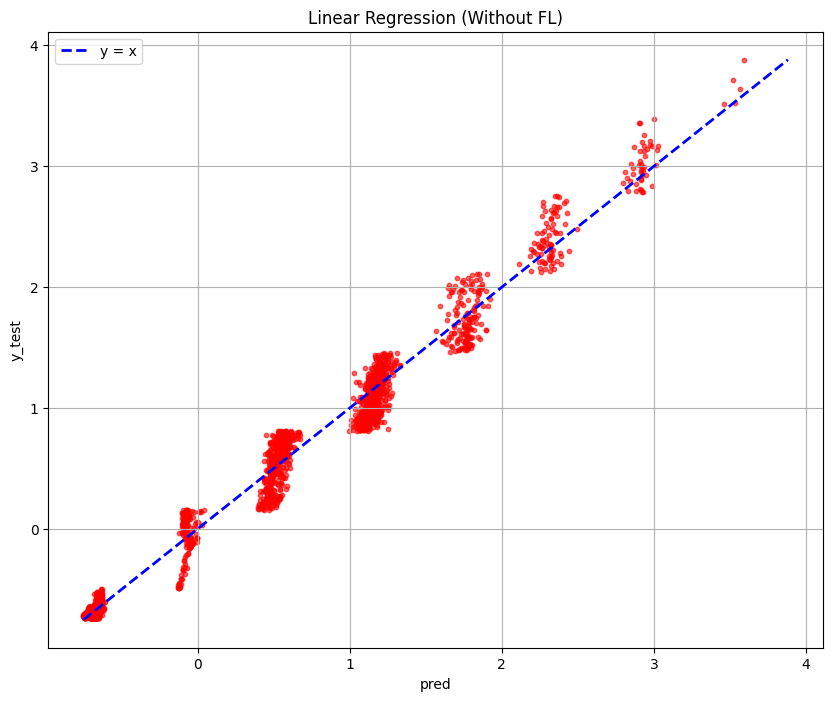

In [33]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(pred), min(y_test))
max_val = max(max(pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("Linear Regression (Without FL)")
plt.xlabel('pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()


In [34]:

# # Scatter plot of predictions vs actual values
# plt.scatter(pred, y_test, color='red')

# # Plot y=x line
# min_val = min(min(pred), min(y_test))
# max_val = max(max(pred), max(y_test))
# plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='y = x')

# # Adding title and labels
# plt.title("Training the same dataset without FL (regular LR)")
# plt.xlabel('predicted')
# plt.ylabel('actual')
# plt.legend()  # Show the legend
# plt.show()


In [35]:
pred.shape

(4380,)

In [36]:
y_test

array([1.1336328833558145, 1.2511430932708638, 1.3136358003249227, ...,
       -0.705865364474675, -0.705865364474675, -0.7091544543196255],
      shape=(4380,), dtype=object)

In [37]:
pred

array([ 1.19938469,  1.2490406 ,  1.27412224, ..., -0.68420792,
       -0.68141747, -0.6799469 ], shape=(4380,))

## R2 score without FL

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(r2) #Without FL

0.9881881599954164
